# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import weather_api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

In [3]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...


KeyboardInterrupt: 

## Perform API Calls

In [ ]:
town = []
cloud = []
country = []
lat = []
long = []
maxtemp = []
windspeed = []
humidity = []
date = []

# set initial count quantities for organization
count = 0
real = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        if count > 48:
            count = 1
            real += 1
            town.append(city)
        else:
            count += 1
            town.append(city)
        print(f"Processing Record {count} of Set {real} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

In [67]:
weatherdf = pd.DataFrame({"City":town, "Cloudiness":cloud, "Country":country, "Date":date,
                            "Humidity":humidity, "Lat":lat, "Long":long, "Max Temp":maxtemp,
                            "Wind Speed":windspeed})
# Export the City_Data into a csv
weatherdf.to_csv(output_data_file)
# Show Record Count
weatherdf.count()

City          0
Cloudiness    0
Country       0
Date          0
Humidity      0
Lat           0
Long          0
Max Temp      0
Wind Speed    0
dtype: int64

In [68]:
# Display the City Data Frame
weatherdf.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed


## Latitude vs. Temperature Plot

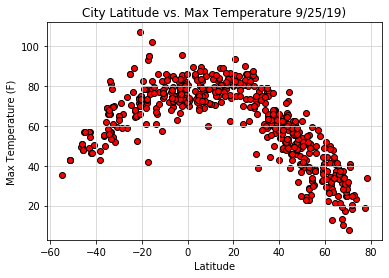

In [25]:
plt.scatter(weatherdf["Lat"],weatherdf["Max Temp"],edgecolors="black",facecolors="red")
plt.title("City Latitude vs. Max Temperature 9/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig1.png")
plt.show()

## Latitude vs. Humidity Plot

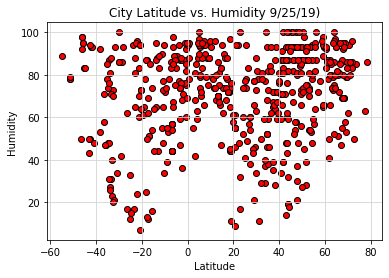

In [26]:
plt.scatter(weatherdf["Lat"],weatherdf["Humidity"],edgecolors="black",facecolors="red")
plt.title("City Latitude vs. Humidity 9/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

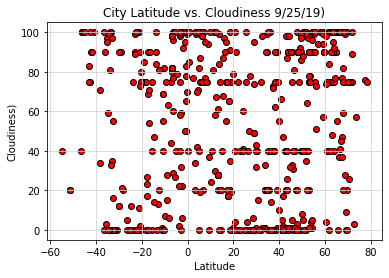

In [27]:
plt.scatter(weatherdf["Lat"],weatherdf["Cloudiness"],edgecolors="black",facecolors="red")
plt.title("City Latitude vs. Cloudiness 9/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

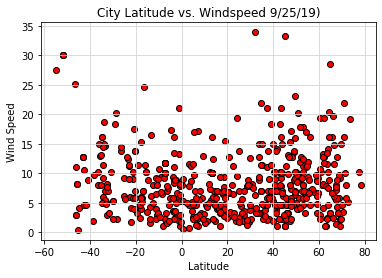

In [28]:
plt.scatter(weatherdf["Lat"],weatherdf["Wind Speed"],edgecolors="black",facecolors="red")
plt.title("City Latitude vs. Windspeed 9/25/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig4.png")
plt.show()

## Linear Regression

In [65]:
# Create Northern and Southern Hemisphere DataFrames
lat

-23

In [61]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
# Add the linear regression equation and line to plot
x_values = housing_data['RM']
y_values = housing_data['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()

# Print out the r-squared value along with the plot.
x_values = housing_data['RM']
y_values = housing_data['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
print(f"The r-squared is: {rvalue}")
plt.show()
    # Plot

    plt.show()

IndentationError: expected an indented block (<ipython-input-61-e96182eaab78>, line 6)

###  Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8276392061745796


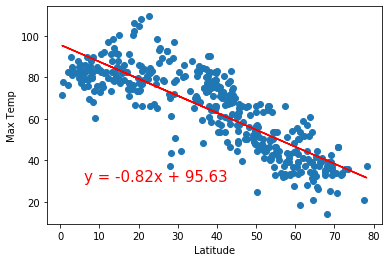

In [36]:
# Linear regression on Northern Hemisphere


The r-squared is: 0.6879055377468192


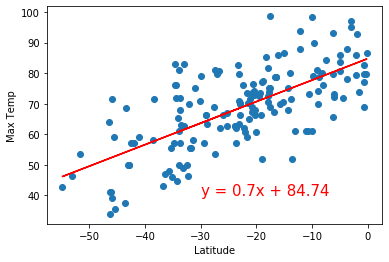

In [37]:
# Linear regression on Southern Hemisphere


The high r value indicates a strong positive correlation between latitude and max temperature.

### Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18923298262557764


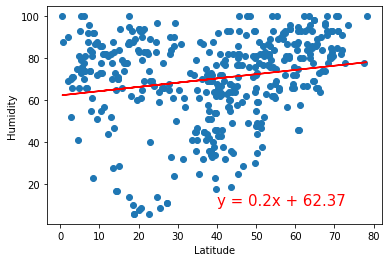

In [38]:
# Northern Hemisphere


The r-squared is: 0.1343905263179015


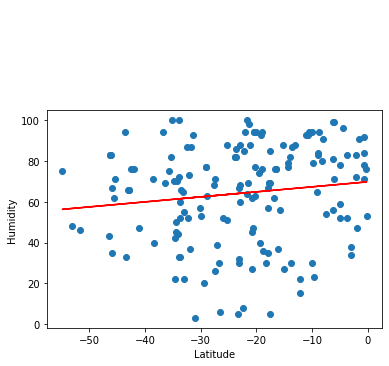

In [39]:
# Southern Hemisphere


The low r values indicate a weak to no relationship between humidity and latitude.

### Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.011670093453285709


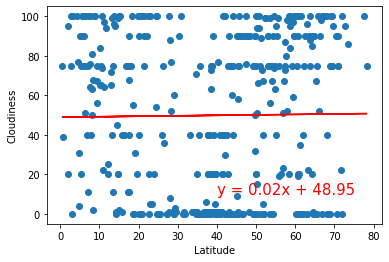

In [40]:
# Northern Hemisphere


The r-squared is: 0.09276074773932115


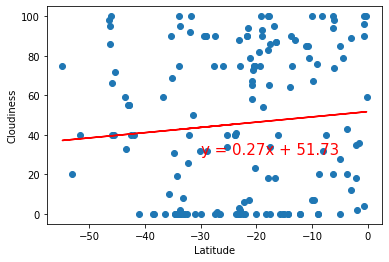

In [41]:
# Southern Hemisphere


The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11443428126836251


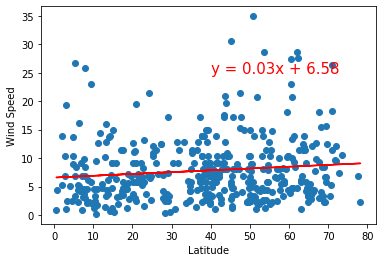

In [42]:
# Northern Hemisphere


The r-squared is: -0.35518370788523734


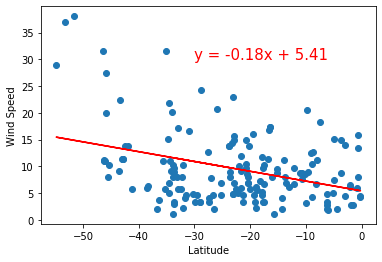

In [43]:
# Southern Hemisphere


The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.